In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing datasets
df_raw_ratings=pd.read_csv("E:/summer/datafiles/raw_analyst_ratings.csv")


df_apple=pd.read_csv("E:/summer/datafiles/yfinance_data/AAPL_historical_data.csv")
df_raw_ratings.head()
# df_raw_ratings['headline'][200]


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# cheecking for missing data
df_raw_ratings.isna().sum()
df_apple.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [4]:
# describe data
df_apple.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


In [5]:
def find_max(raw_feature,history_feature):
    """takes raw_feature and history_feature and return the raw_feature value where history feature is maximum"""
    max_value=0
    max_col=0
    for i in range( len(history_feature["Open"])):
        if history_feature["Open"][i] >=max_value:
            max_value=history_feature["Open"][i]
            max_col=i
        
    
    return raw_feature["headline"][max_col]



find_max(df_raw_ratings,df_apple)
    



'51 Biggest Movers From Yesterday'

In [6]:
# Count the number of articles per publisher to identify which publishers are most active.
print('number of articles per date')
print(f'{df_raw_ratings["date"].value_counts()}')
print('number of articles per publisher')
publisher_counts=df_raw_ratings["publisher"].value_counts()
publisher_counts

number of articles per date
2020-03-12 00:00:00          1766
2020-02-27 00:00:00          1292
2020-02-28 00:00:00          1239
2019-08-01 00:00:00          1228
2020-03-06 00:00:00          1147
                             ... 
2016-05-30 20:24:29-04:00       1
2016-05-31 04:40:26-04:00       1
2016-05-31 06:12:15-04:00       1
2016-05-31 09:03:39-04:00       1
2017-11-14 13:25:57-04:00       1
Name: date, Length: 39957, dtype: int64
number of articles per publisher


Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: publisher, Length: 1034, dtype: int64

In [7]:
# companys in the stock market
df_raw_ratings["stock"].value_counts()

MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: stock, Length: 6204, dtype: int64

In [8]:
# Convert the 'date' column to a datetime format with timezone information
df_raw_ratings['date'] = pd.to_datetime(df_raw_ratings['date'], utc=True)

# Convert the 'date' column to the desired timezone (e.g., America/New_York)
df_raw_ratings['date'] = df_raw_ratings['date'].dt.tz_convert('America/New_York')

In [9]:
# Compute and summarize the statistical distribution of headline lengths
df_raw_ratings['headline_length'] = df_raw_ratings['headline'].apply(len)
headline = df_raw_ratings['headline_length'].describe()
print("Statistical Summary of Headline Lengths:")
print(df_raw_ratings['headline'][0])
df_raw_ratings['headline_length'].max()

Statistical Summary of Headline Lengths:
Stocks That Hit 52-Week Highs On Friday


512

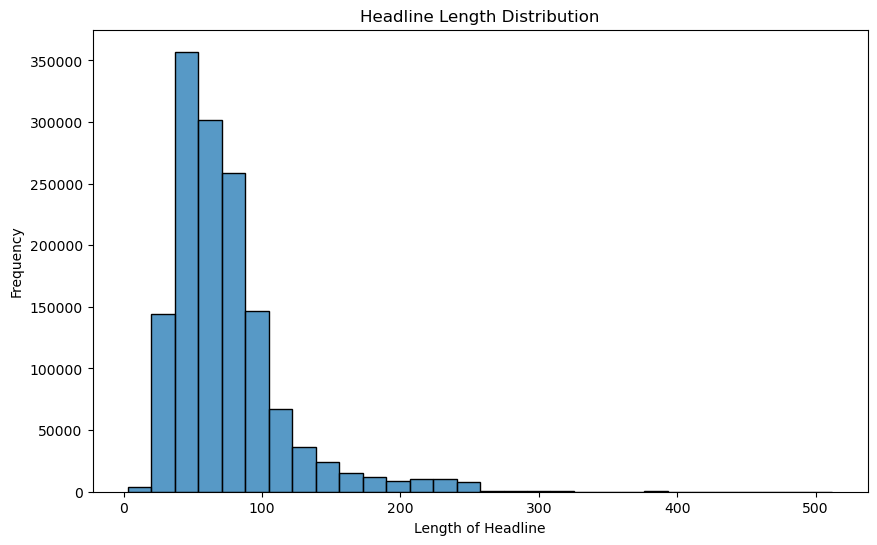

In [10]:

# Visualize the frequency distribution of headline lengths with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_raw_ratings['headline_length'], bins=30)
plt.title('Headline Length Distribution')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()


ploting number of articles per a date

In [11]:
df_raw_ratings['headline'].value_counts

<bound method IndexOpsMixin.value_counts of 0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object>


Number of Articles Published Over Time:


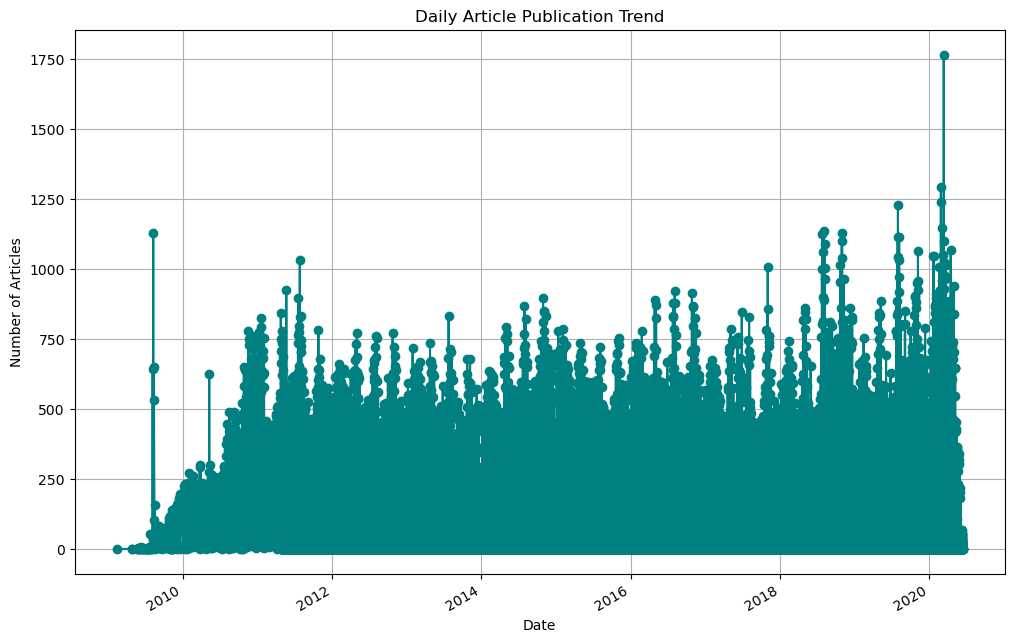

In [24]:
df_raw_ratings['day_of_week']=df_raw_ratings['date'].dt.day_name()
articles_per_day = df_raw_ratings.groupby('date').size()
print("\nNumber of Articles Published Over Time:")
plt.figure(figsize=(12,8))
articles_per_day.plot(kind='line', color='teal', marker='o')
plt.title('Daily Article Publication Trend')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
# plt.tight_layout()
plt.show()

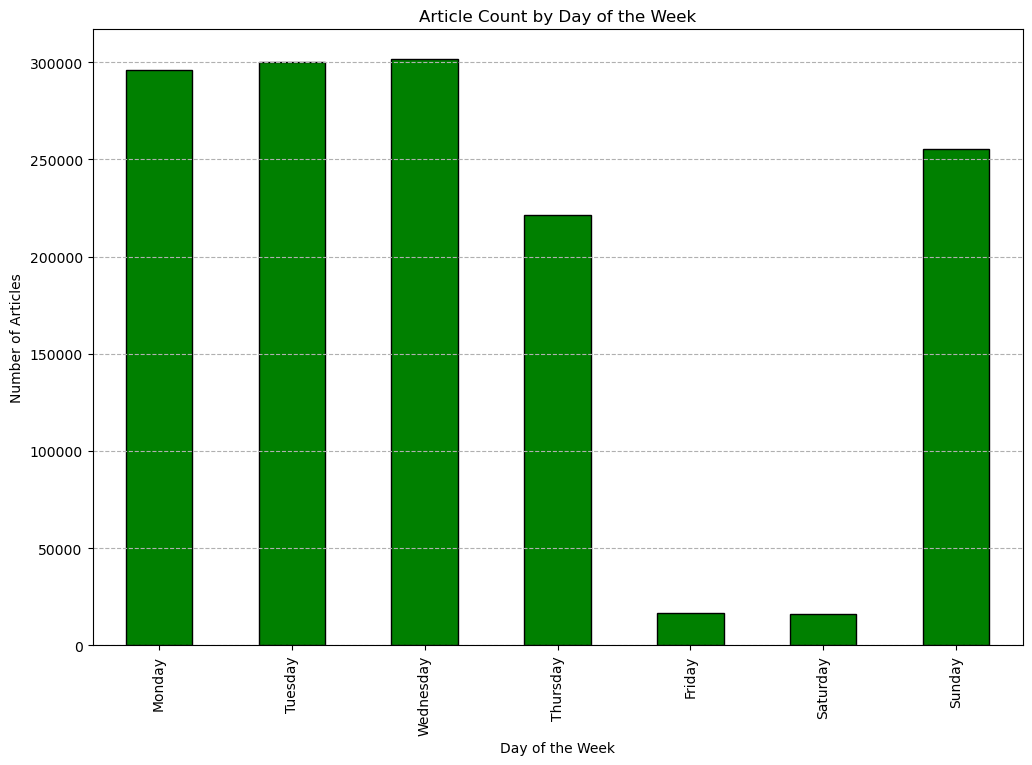

In [18]:
plt.figure(figsize=(12, 8))
df_raw_ratings['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='green', edgecolor='black')
plt.title('Article Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')

plt.grid(axis='y', linestyle='--')
plt.show()